In [1]:
from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import urllib.request

def Google_Translate_API(word):
    '''
    API to Google Translate
    '''
    url = 'https://translate.google.com/m?sl=%s&tl=%s&ie=UTF-8&prev=_m&q=%s' % ('id', 'en',word.replace(" ","+")) 
    agent = {'User-Agent':'Mozilla/5.0'}
    request = urllib.request.Request(url, headers=agent)
    page = urllib.request.urlopen(request).read().decode('utf-8')
    result = page.split('class="t0">')[1].split('<')[0]
    return result

df_evolution_weekly = pd.read_csv('F:/WB/Issue Monitoring/data/TOP_10_Evolution_Weekly_Similar_Issue_Keyword.csv')
# df_evolution_weekly = pd.read_csv('F:/WB/Issue Monitoring/data/Sentiment_Evolution_Weekly_Similar_Issue_Keyword.csv')

df_evolution_weekly_prepared = pd.DataFrame(columns=['topic','week','keyword','count'])
for topic in list(df_evolution_weekly['topic'].unique()):
    df_temp = df_evolution_weekly[df_evolution_weekly.topic==topic]
    for week in list(df_temp['week_of_the_year'].unique()):
        df_temp_daily = df_temp[df_temp.week_of_the_year==week].reset_index(drop=True)
        for i in range(len(df_temp_daily)):
            df_evolution_weekly_prepared = df_evolution_weekly_prepared.append({'topic':topic,'week':week,'keyword':df_temp_daily.loc[i,'keyword'],'count':df_temp_daily.loc[i,'keyword_count']},ignore_index=True)

            df_evolution_weekly_prepared = df_evolution_weekly_prepared.append({'topic':topic,'week':week,'keyword':df_temp_daily.loc[i,'similar_keyword'],'count':df_temp_daily.loc[i,'similar_keyword_count']},ignore_index=True)

df_evolution_weekly_prepared = df_evolution_weekly_prepared.drop_duplicates()

Generating 100% Stacked Area Chart for Topic: economic policy


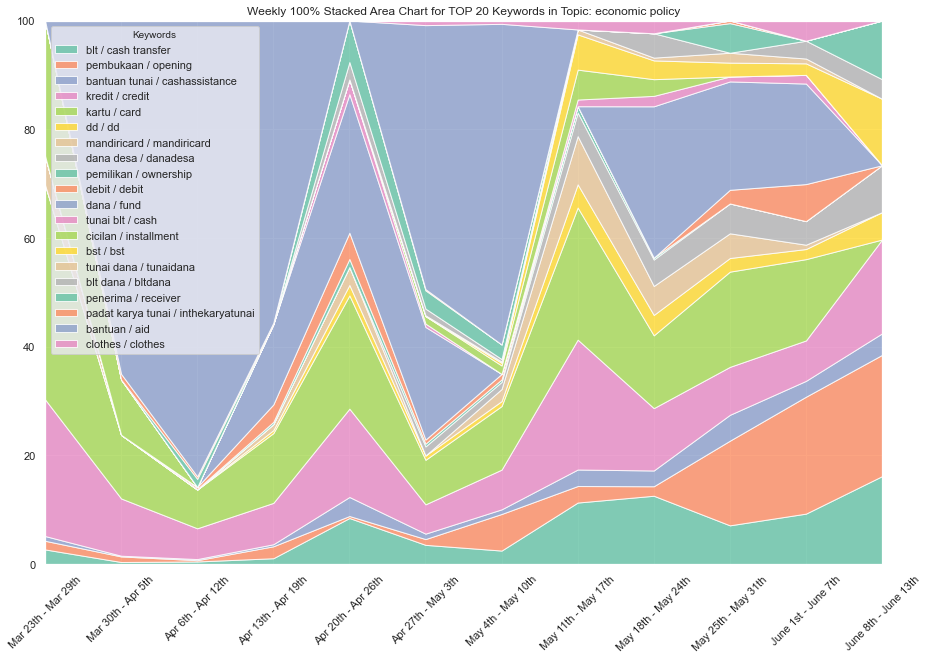

Generating 100% Stacked Area Chart for Topic: stigma


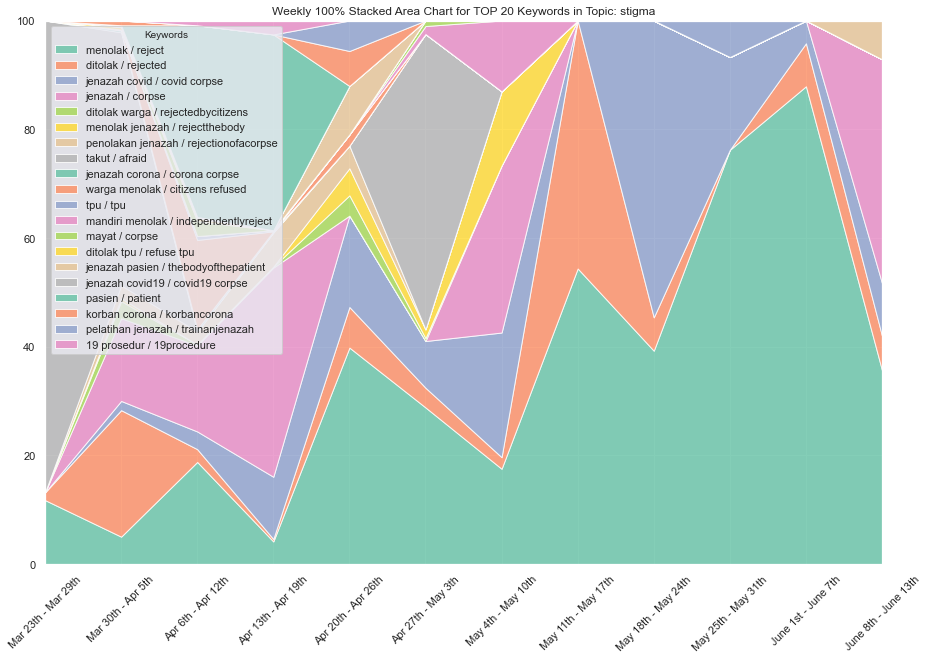

Generating 100% Stacked Area Chart for Topic: health care


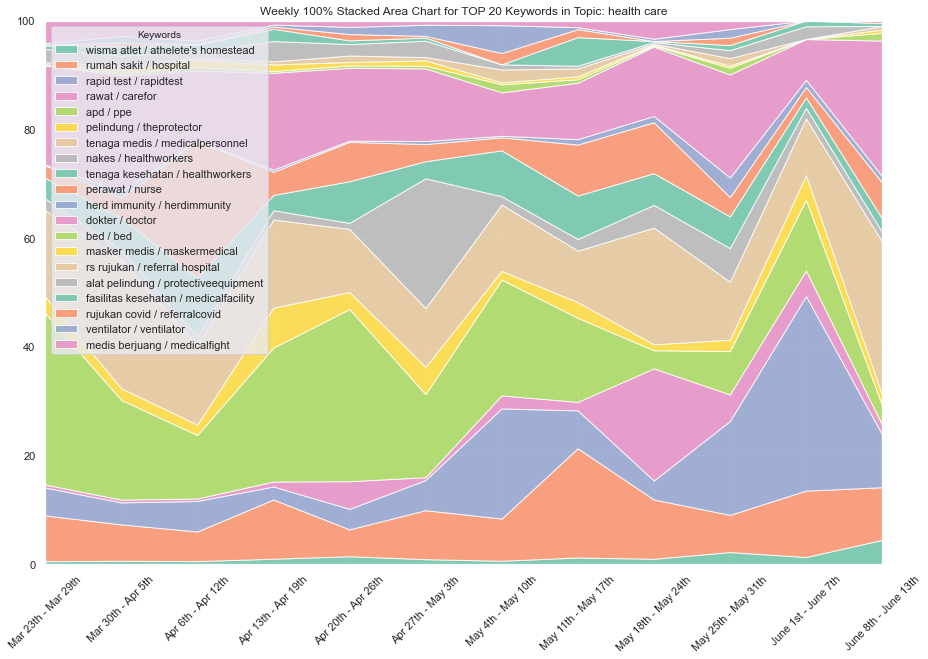

Generating 100% Stacked Area Chart for Topic: food access


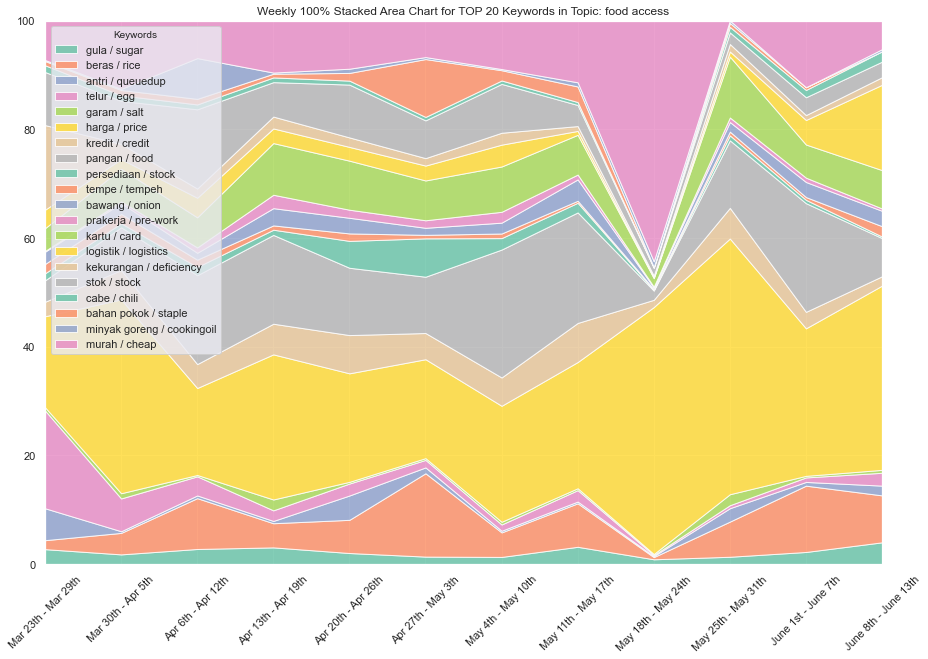

Generating 100% Stacked Area Chart for Topic: confidence in government


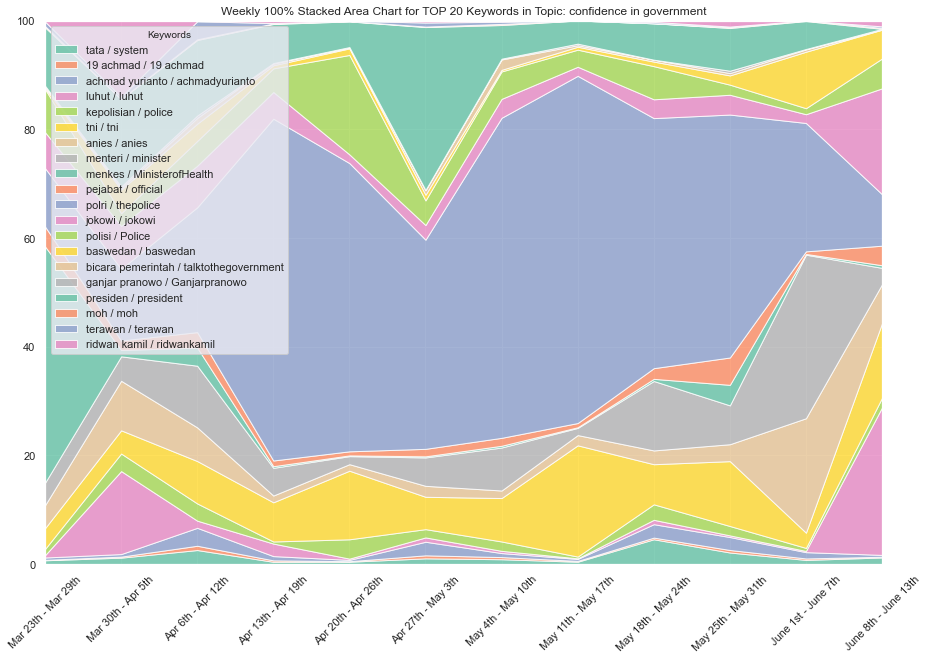

Generating 100% Stacked Area Chart for Topic: mobility


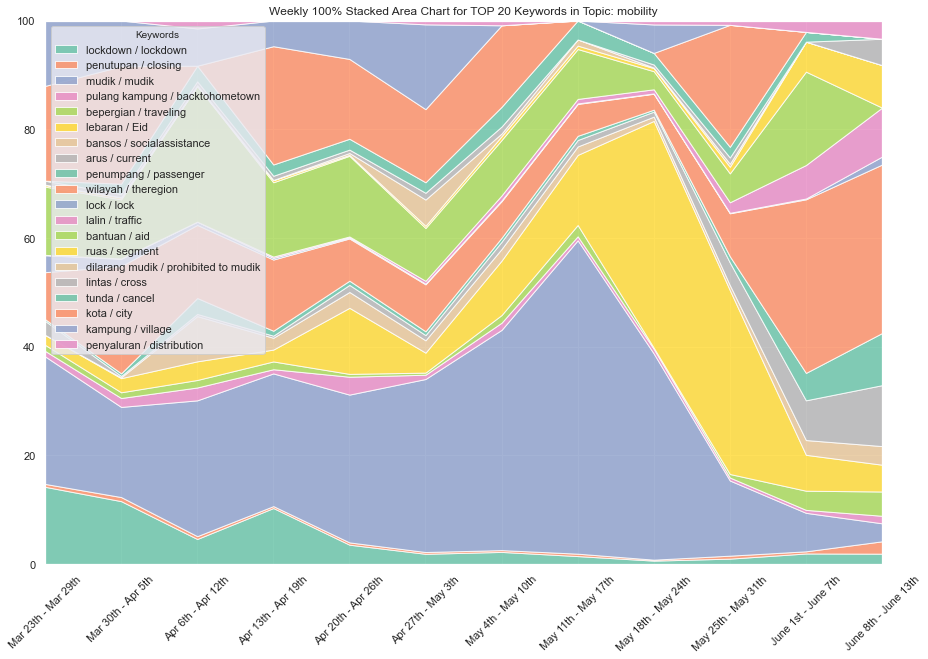

Generating 100% Stacked Area Chart for Topic: employment


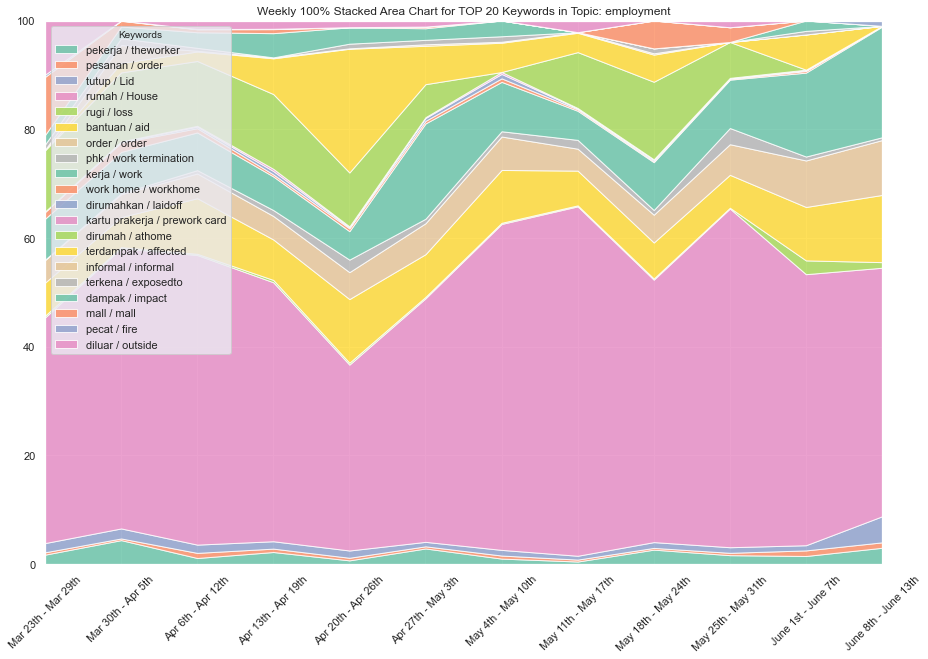

Generating 100% Stacked Area Chart for Topic: health protocol


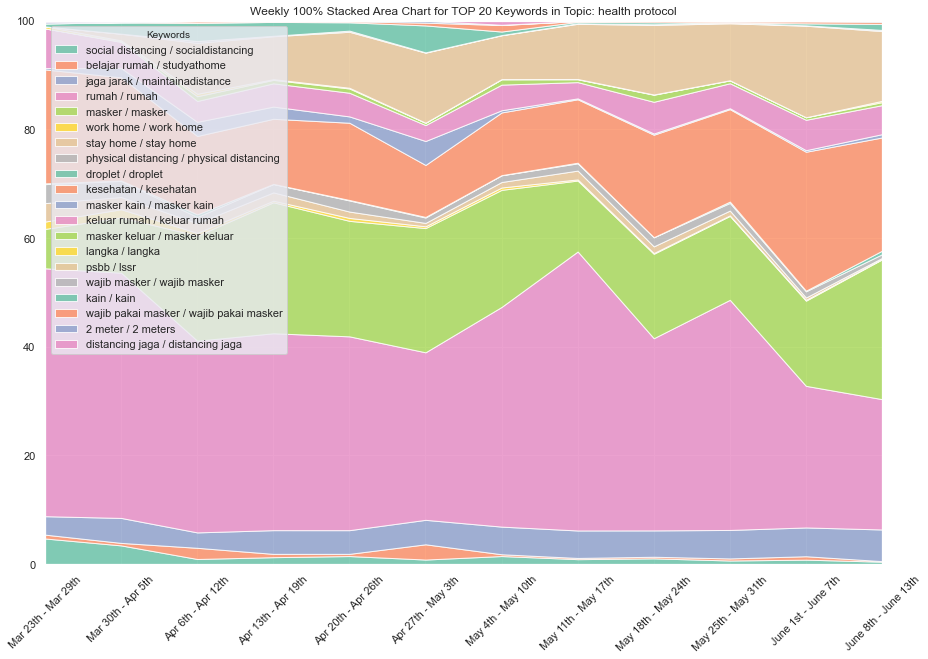

In [2]:
translate_dict={'bantuan':'aid',
'apd':'ppe',
'garda':'guard',
'psbb':'lssr',
'drpd':'instead of',
'jgn':'do not',
'garda terdepan':'front guard',
'hasile':'result',
'kasi':'give',
'kasih' : 'give',
'gausah':'no need',
'liwat':'through',
'santuy':'relax',
'kenacorona':'infectedbycorona',
'videowarga':'citizensvideo',
'dunia covid':'covid world',
'warga menolak':'citizens refused',
'jenazah covid':'covid corpse',
'jenazah covid19':'covid19 corpse',
'jenazah corona':'corona corpse',
'mudik':'mudik',
'dilarang mudik':'prohibited to mudik',
'kampung lindungi':'protect the village',
'19 ditolak':'19 rejected',
'jenazah dalam':'corpse inside',
'nolak jenazah':'refuse corpse',
'didoakan musuh':'prayed by the enemies',
'ditolak gede':'big refusal',
'ditolak tpu':'refuse tpu',
'dki bertambah':'dki increases',
'jawa menghadang':'jawa blocks',
'depok kota':'depok city',
'rs rujukan':'referral hospital',
'rs darurat':'emergency hospital',
'nakes':'healthworkers',
'atlet kemayoran':'kemayoran athletes',
"wisma atlet":"athelete's homestead",
'pelindung apd':'ppe protector',
'atlet rs':'athlete hospital',
'masker n95':'n95 mask',
'bedah n95':'n95 surgery',
'n95 petugas':'n95 officer',
'kartu pra kerja':'pre work card',
'kartu prakerja':'prework card',
'19 achmad':'19 achmad',
'2 meter':'2 meters',
'2m':'2m',
'4m':'4m',
'25m':'25m',
'05m':'05m',
'1 meter':'1 meter',
'2mfacility':'2mfacilities',
'80rbkain':'80 thousands fabric',
'rumah keperluan':'home needs',
'rumah urgent': 'house urgent',
'keluar dalem':'inside out',
'physical distancing':'physical distancing',
'blt' : 'cash transfer',
'phk': 'work termination',
'sdm' : 'human resources'}

week_dict = {
    1 : 'Jan 1st - Jan 5th',
    2 : 'Jan 6th - Jan 12th',
    3 : 'Jan 13th - Jan 19th',
    4 : 'Jan 20th - Jan 26th',
    5 : 'Jan 27th - Feb 2nd',
    6 : 'Feb 3rd - Feb 9th',
    7 : 'Feb 10th - Feb 16th',
    8 : 'Feb 17th - Feb 23th',
    9 : 'Feb 24th - Mar 1st',
    10 : 'Mar 2nd - Mar 8th',
    11 : 'Mar 9th - Mar 15th',
    12 : 'Mar 16th - Mar 22th',
    13 : 'Mar 23th - Mar 29th',
    14 : 'Mar 30th - Apr 5th',
    15 : 'Apr 6th - Apr 12th',
    16 : 'Apr 13th - Apr 19th',
    17 : 'Apr 20th - Apr 26th',
    18 : 'Apr 27th - May 3th',
    19 : 'May 4th - May 10th',
    20 : 'May 11th - May 17th',
    21 : 'May 18th - May 24th',
    22 : 'May 25th - May 31th',
    23 : 'June 1st - June 7th',
    24 : 'June 8th - June 13th'
}

for topic in list(df_evolution_weekly_prepared['topic'].unique()):
    print('Generating 100% Stacked Area Chart for Topic: {}'.format(topic))
    # df_sentiment_filter = df_sentiment_daily[df_sentiment_daily.topic==topic]
    df_filter = df_evolution_weekly_prepared[df_evolution_weekly_prepared.topic==topic]
    TOP_20_keywords = list(df_filter.groupby('keyword').count()['count'].sort_values(ascending=False).head(20).index)
    
    translated_TOP_20_keywords = []
    for i in range(20):
        try:
            translated_TOP_20_keywords.append(translate_dict[TOP_20_keywords[i]])
        except:
            try:
                translated_TOP_20_keywords.append(re.sub(r'[^a-zA-Z-0-9]','',Google_Translate_API(re.sub(r'[^a-zA-Z-0-9]','',TOP_20_keywords[i]))))
            except:
                translated_TOP_20_keywords.append(TOP_20_keywords[i])

    df_filter = df_filter.sort_values(by='week').reset_index(drop=True)
    df_filter = df_filter[df_filter['keyword'].isin(TOP_20_keywords)].reset_index(drop=True)
    week_list = list(df_filter['week'].unique())
    x = [week_dict[week] for week in week_list]
    y = []
    legend = []
    i=0
    for keyword in TOP_20_keywords:
        yy = []
        df_filter_keyword = df_filter[df_filter['keyword']==keyword]
        for week in week_list:
            try:
                yy.append(df_filter_keyword[df_filter_keyword.week==week]['count'].values[0])
            except:
                yy.append(0)
        y.append(yy)
        legend.append(keyword + ' / ' + translated_TOP_20_keywords[i])
        i+=1
    
    y = np.vstack(y)
    y = y /  y.sum(axis=0).astype(float) * 100 

    fig, ax1 = plt.subplots(figsize=(15,10))
    plt.title("Weekly 100% Stacked Area Chart for TOP 20 Keywords in Topic: {}".format(topic))
    pal = sns.color_palette("Set2")
    ax1.stackplot(x, y, labels=legend,colors=pal,alpha=0.8)
    ax1.tick_params(axis='x', rotation=45)
    ax1.legend(legend,loc='upper left',title="Keywords")
    ax1.set_xlim([x[0],x[-1]])
    ax1.set_ylim([0,100])
    plt.show()
    fig.savefig('chart_output/weekly_keyword_evolution_{}.png'.format(topic), dpi=fig.dpi)